<h1 align="center">Web Scraping using Beautiful Soup</h1>

The internet is an absolutely massive source of data, There is a lot of information out there, But It isn’t always available in convenient CSV exports or easy-to-connect APIs.
and the Web Scraping remain the only way for accessing to the data.

In this Notebook we’re going to cover how to do web scraping with Python from scratch using Beautiful Soup. we’ll work through an actual web scraping project, focusing on weather data.

## The Fundamentals of Web Scraping:
### What is Web Scraping?

Some websites offer data sets that are downloadable in CSV format, or accessible via an Application Programming Interface (API). But many websites with useful data don’t offer these convenient options.

Consider for example, The Weather Channel that provide national and local weather forecast for cities over the world. But the weather data isn’t accessible as a CSV or via API. It has to be viewed on its website `weather.com`. 

---------- Image-------------

In order to get and work with this data we need Web Scraping.

Web scraping is an automatic method to obtain large amounts of data from websites.

In this workshop we’ll write some code that looks at the The *Weather Channel* site, grabs just the data we want to work with, and outputs it in the format we need.


### How Does Web Scraping Work?
When we scrape the web, we write code that sends a request to the server that’s hosting the page we specified. The server will return the source code — HTML, mostly — for the page (or pages) we requested. and we will look into specific element in this code and extract the content we are interested about.

In short Web Scraping can be resumed into these steps:
1. Request the content (source code) of a specific URL from the server
2. Download the content that is returned
3. Identify the elements of the page that are part of the table we want
4. Extract and (if necessary) reformat those elements into a dataset we can analyze or use in whatever way we require.

### Is Web Scraping Legal?
There’s not a cut-and-dry answer here. Some websites explicitly allow web scraping. Others explicitly forbid it. Many websites don’t offer any clear guidance one way or the other.

Before scraping any website, we should look for a terms and conditions page to see if there are explicit rules about scraping. If there are, we should follow them. If there are not, then it becomes more of a judgement call.


### Web Scraping Best Practices:
- Never scrape more frequently than you need to.
- Consider caching the content you scrape so that it’s only downloaded once.
- Build pauses into your code between requests to keep you from overwhelming servers with too many requests too quickly.


## The Components of a Web Page

When we visit a web page, our web browser makes a request to a web server. This request is called a `GET` request, since we’re getting files from the server. The server then sends back files that tell our browser how to render the page for us. These files will typically include:
- HTML — the main content of the page.
- CSS — used to add styling to make the page look nicer.
- JS — Javascript files add interactivity to web pages.

### HTML page structure

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

![](data/tag.png)

HTML has a tree-like 🌳 🌲 structure thanks to the **Document Object Model (DOM)**, a cross-platform and language-independent interface. Here's how a very simple HTML tree looks like.

![](data/dom_tree.gif)

There are a lot of tags that we don't cover here, for a full list of tags, look [here](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).

**Class and ID**

Before we move into actual web scraping, let’s learn about the class and id properties. These special properties give HTML elements names, and make them easier to interact with when we’re scraping.

One element can have multiple classes, and a class can be shared between elements. Each element can only have one id, and an id can only be used once on a page. Classes and ids are optional, and not all elements will have them.

### Creating a simple HTML page

In [ ]:
from IPython.core.display import display, HTML

In [ ]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
    <li>Policy recommendations</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

### Web Scraping with `requests` and `BeautifulSoup`

We will use `requests` and `BeautifulSoup` to access and scrape the content of `weather.com`

### What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

### Our pipeline
![](data/scrape-pipeline.png)

In [72]:
import requests
page = requests.get("https://weather.com/weather/tenday/l/5e2010d275d3c3e16462d93f0d75ebe5db3a56f8477c6e14bc8f14b436f4f71b#detailIndex5")
# page = requests.get("http://istodaytietuesday.com/")

page

<Response [200]>

In [10]:
page.content

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n        <title>Is Today Tie Tuesday?</title>\n        <meta name="description" content="">\n        <meta name="viewport" content="width=device-width">\n\n        <link rel="stylesheet" href="css/normalize.min.css">\n        <link rel="stylesheet" href="css/main.css">\n        <link rel="shortcut icon" type="image/x-icon" href="favicon_no.ico">\n    </head>\n    <body data-isTuesday="unsure">\n        <div class="main-container">\n            <div class="answer">\n                <h1 class="answer-text"></h1>\n            </div>\n        </div>\n\n        <script>window.jQuery || 

We can use the BeautifulSoup library to parse this document, and extract the text from the p tag.

We first have to import the library, and create an instance of the BeautifulSoup class to parse our document:

In [73]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

We can now print out the HTML content of the page, formatted nicely, using the prettify method on the BeautifulSoup object.

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Be prepared with the most accurate 10-day forecast for Casablanca, Casablanca-Settat, Morocco with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content="app-id=295646461" data-
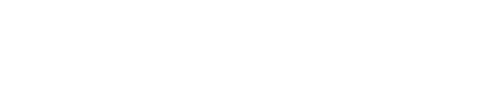
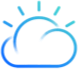

In [74]:
print(soup.prettify())

Here are some simple ways to navigate that data structure:

In [ ]:
soup.title
# <title>Is Today Tie Tuesday?</title>

soup.title.name
# 'title'

soup.title.string
# 'Is Today Tie Tuesday?'

soup.title.parent.name
# 'head'

soup.link
# <link href="css/normalize.min.css" rel="stylesheet"/>

soup.div
# <div class="main-container">
# <div class="answer">
# <h1 class="answer-text"></h1>
# </div>
# </div>

soup.div['class']
# ['main-container']

soup.find_all('div')
# [<div class="main-container">
#  <div class="answer">
#  <h1 class="answer-text"></h1>
#  </div>
#  </div>,
#  <div class="answer">
#  <h1 class="answer-text"></h1>
#  </div>]

soup.find(id="link3")

## Now Let's work with the `weather.com` website together